In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import combinations
import os



In [2]:
# Define the path where your dataset is located
dataset_csv_path='/Users/khalifa/Desktop/Machine Learning-Based IDS/CSV'

# List all CSV files that are part of the dataset
csv_file_names= [
    'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
    'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    'Friday-WorkingHours-Morning.pcap_ISCX.csv',
    'Monday-WorkingHours.pcap_ISCX.csv',
    'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
    'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
    'Tuesday-WorkingHours.pcap_ISCX.csv',
    'Wednesday-workingHours.pcap_ISCX.csv'
]

# Initialize an empty list to store the full paths of csv files
full_path=[]

# Combine the dataset path with each csv file name, and add them to the list
for csv_file in csv_file_names:
    full_path.append(os.path.join(dataset_csv_path,csv_file))  # Use os.path.join() to form complete filepath to each csv file

# Use pandas pd.read_csv() function to read each csv file from the list 'full_path', 
# Then use pd.concat() to concatenate all these csv files into one DataFrame 'df', while ignoring indexes.
df = pd.concat(map(pd.read_csv,full_path),ignore_index=True)

# Display the first five rows of the DataFrame using df.head()
df.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
# Print a message showing all column names in DataFrame 'df' using df.columns attribute, 
# which returns an Index object containing column labels of the DataFrame.
print("The columns present in the dataset are: ",df.columns)


The columns present in the dataset are:  Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet 

In [4]:
# The df.info() function in pandas library is used to print a concise summary of a DataFrame.
# Here 'df' is assumed to be a DataFrame object.

df.info()

# This function returns important information about the DataFrame, such as:
#   - The number of entries (rows).
#   - The total columns.
#   - The names of all columns.
#   - The data type of each column.
#   - Non-null values in each column.
#   - Memory usage.
# By calling df.info(), we can quickly understand the structure and data types of our DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [5]:
# The df.describe() function in pandas library is used to generate a statistical summary of a DataFrame.
# Here 'df' is assumed to be a DataFrame object.

df.describe()

# This function returns important statistical information about the numerical columns within the DataFrame, such as:
#   - The count (number of non-null values) for each column.
#   - Mean value of each column.
#   - Standard deviation (std) which shows the amount of variation or dispersion of a set of values.
#   - Minimum value within each column of the DataFrame.
#   - 25th percentile (also known as Q1), 50th percentile(also known as Q2 or median), and 75th percentile (also known as Q3).
#   - Maximum value within each column of the DataFrame.
# Using df.describe(), we can quickly get a sense of the distribution of values across our DataFrame.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [6]:
df[' Label'].nunique()

15

In [7]:
# Define a function for data cleaning
def data_cleaning(df):

    # Stripping any whitespace from column names in the DataFrame
    df.columns=df.columns.str.strip()

    # Printing the shape of the data i.e., no. of rows and columns
    print("Dataset Shape: ",df.shape)

    # Getting numerical data from the DataFrame and replacing any negative numbers with 0 
    num=df._get_numeric_data()
    num[num<0]=0

    # Finding and dropping the zero variance columns 
    zero_variance_cols=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
    df.drop(columns=zero_variance_cols,axis=1,inplace=True)
    print("Zero Variance Columns: ",zero_variance_cols, " are dropped!!")
    print("Shape after removing the zero variance columns: ",df.shape)

    # Replacing infinite values with NaN (Not a Number) and dropping rows containing NaN values
    df.replace([np.inf,-np.inf],np.nan,inplace=True)
    print(df.isna().any(axis=1).sum(), "rows dropped")
    df.dropna(inplace=True)
    print("Shape after Removing NaN: ",df.shape)

    # Dropping duplicate rows
    df.drop_duplicates(inplace=True)
    print("Shape after dropping duplicates: ",df.shape)

    # Finding pairs of columns which have identical values and then dropping such columns
    column_pairs = [(i,j) for i,j in combinations(df,2) if df[i].equals(df[j])]
    ide_cols=[]
    for col_pair in column_pairs:
        ide_cols.append(col_pair[1])
    df.drop(columns=ide_cols,axis=1,inplace=True)
    print("Columns which have identical values: ",column_pairs," dropped!")
    print("Shape after removing identical value columns: ",df.shape)
    
    # Returning the cleaned DataFrame
    return df

# Calling the data cleaning function on our DataFrame 'df'
df=data_cleaning(df)


Dataset Shape:  (2830743, 79)
Zero Variance Columns:  ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']  are dropped!!
Shape after removing the zero variance columns:  (2830743, 71)
2867 rows dropped
Shape after Removing NaN:  (2827876, 71)
Shape after dropping duplicates:  (2520798, 71)
Columns which have identical values:  [('Total Fwd Packets', 'Subflow Fwd Packets'), ('Total Backward Packets', 'Subflow Bwd Packets'), ('Fwd PSH Flags', 'SYN Flag Count'), ('Fwd URG Flags', 'CWE Flag Count'), ('Fwd Header Length', 'Fwd Header Length.1')]  dropped!
Shape after removing identical value columns:  (2520798, 66)


In [8]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
df['Label'].value_counts()

Label
BENIGN                        2095057
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

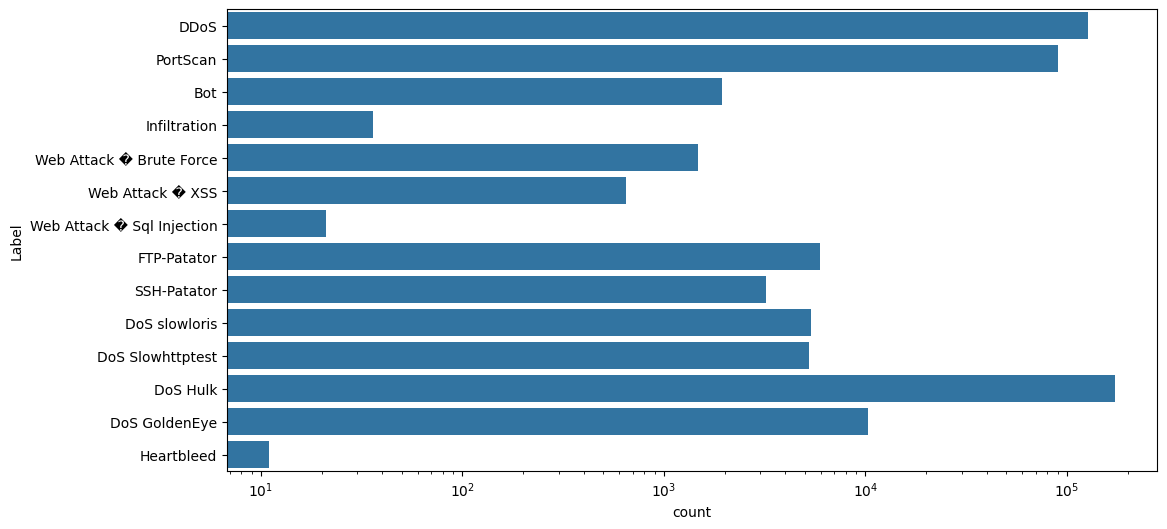

In [10]:


# Assuming df is your DataFrame
# Ensure 'Label' is a column in your DataFrame
if 'Label' not in df.columns:
    print("Label column does not exist in the dataframe")
else:
    plt.figure(figsize=(12,6))
    
    # Filter out rows where 'Label' is not 'BENIGN'
    df_filtered = df[df['Label'] != 'BENIGN']

    # Plot
    plot = sns.countplot(y='Label', data=df_filtered)
    plt.xscale('log')
    fig = plot.get_figure()
    fig.savefig('img1.png')


In [11]:
# This line of code takes every column name in the DataFrame 'df'
# It performs several operations to clean up the column names 
# These operations are applied in order, let's break them down:
# 1. 'str.strip()' removes leading and trailing white spaces from each column name
# 2. 'str.lower()' converts each column name into lower case.
# 3. 'str.replace(' ', '_')' replaces any space characters with underscores
# 4. 'str.replace('(', '')' removes any opening parenthesis
# 5. 'str.replace(')', '')' removes any closing parenthesis
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')

# This will display the first 5 rows of the dataframe 'df'
# It's useful to confirm that the above transformations worked as expected
df.head()


,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [12]:
df['label'].value_counts()

label
BENIGN                        2095057
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [13]:
new_df=df.copy()

# Binary Classification

In [14]:
# The first line is using a conditional statement to check if the label column in DataFrame df has value other than 'BENIGN'
# If the label is not 'BENIGN', it replaces it with 'ATTACK'
# This could be useful for classifying data into two categories - benign or attack
df.loc[df['label'] != 'BENIGN', 'label'] = 'ATTACK'

# This line displays the first 5 rows of the DataFrame 'df'
# It allows to verify if the previous operation worked as expected
df.head()


,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [15]:
df.label.value_counts()

label
BENIGN    2095057
ATTACK     425741
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

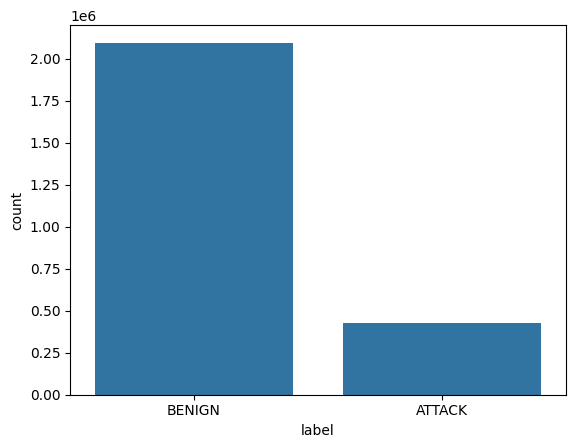

In [16]:
# This line creates a count plot using the seaborn (sns) library
# The data parameter is set to the DataFrame 'df'
# The x parameter is set to the 'label' column in the DataFrame
# Countplot will display a bar for each unique value in 'label' column. The height of the bar denotes the number of occurrences of each value.
sns.countplot(data=df, x=df['label'])


# balancing


In [17]:
# This line of code gets the length (number of rows) of a subset of the DataFrame 'df' where the 'label' column is equal to 'ATTACK'.
size=len(df.loc[df.label=='ATTACK'])

# The number of ATTACK entries in the dataframe is then printed.
print(size)

# groupby('label') groups the DataFrame based on unique values in 'label' column
# apply() function applies a lambda function to each group created by groupby
# In the lambda function, x.sample(n=min(size,len(x))) is used. Here, 'x' refers to each grouped data.
# sample() function randomly picks 'n' number of elements from the grouped data, where 'n' is the minimum of 'size' and the size of grouped data.
# This results in a balanced DataFrame where all 'label' categories have either equal to or fewer entries than 'ATTACK'
bal_df=df.groupby('label').apply(lambda x: x.sample(n=min(size, len(x))))


425741


In [18]:
bal_df.shape

(851482, 66)

In [20]:
# This line of code selects all rows in the dataframe 'bal_df' where 'label' equals 'ATTACK',
# and then replaces the 'label' value with 1. 
# In other words, it's transforming the 'ATTACK' label into a numerical representation (1).
bal_df.loc[bal_df['label']== 'ATTACK','label']=1

# This line of code does the same but for rows where 'label' equals 'BENIGN'.
# It replaces 'BENIGN' with 0, effectively binarizing the 'label' column.
bal_df.loc[bal_df['label']=='BENIGN','label']=0


In [21]:
type(bal_df.label)

pandas.core.series.Series

In [22]:
# Importing the needed modules:
# - train_test_split function to split our dataset into training and testing subsets
# - MinMaxScaler class for scaling features to a given range (0, 1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Creating a DataFrame 'X' by dropping the 'label' column from 'bal_df'. 
# 'X' will contain all features that we are going to use to predict 'label'.
X = bal_df.drop(columns='label')

# Defining 'y' as the 'label' column of 'bal_df', converting its values to integer data type.
# It's done because our labels were transformed into binary indicators ('0' for 'BENIGN' and '1' for 'ATTACK').
y = bal_df['label'].astype('int')

# Scaling the features in 'X' using 'MinMaxScaler' so that they fall into the [0, 1] range. 
# It helps improving performance of some machine learning algorithms.
X = MinMaxScaler().fit_transform(X)


In [23]:
# Splitting 'X' and 'y' into training and testing sets.
# test_size=0.25 implies that 25% of the data will be used for testing, and the rest (75%) will be used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Printing the shapes of our training and testing sets.
# It is important to check these shapes to ensure that our split was performed correctly.
print(X_train.shape, " ", X_test.shape)  # Printing the shapes of 'X_train' and 'X_test'. 

print(y_train.shape, " ", y_test.shape)  # Printing the shapes of 'y_train' and 'y_test'.


(638611, 65)   (212871, 65)
(638611,)   (212871,)


In [24]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,f1_score,precision_score,recall_score
def classify(model):
    model.fit(X_train,y_train)
    model.score(X_test,y_test)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    fig=plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    cm=confusion_matrix(y_test,y_pred,normalize='true')
    sns.heatmap(cm,annot=True)
    fpr,tpr,thresholds=roc_curve(y_test,y_pred)
    plt.subplot(1,2,2)
    plt.plot(fpr,tpr,label='ROC Curve')
    plt.plot([0,1],[1,0],'k--',label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.xlim([-0.02,1])
    plt.ylim([0,1.02])
    plt.legend(loc='lower right')
    print("The Accuracy of the Model is",accuracy_score(y_test,y_pred))
    print("The Precision of the Model is",f1_score(y_test,y_pred))
    print("The Recall of the Model is",precision_score(y_test,y_pred))
    print("The F1 Score of the Model is",recall_score(y_test,y_pred))

In [25]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier# Importing necessary libraries from sklearn.metrics for model evaluation.
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, f1_score, precision_score, recall_score

# Defining a function classify() that takes in a model, fits the training data to it and scores it against the test data. 
# The function also generates prediction metrics and plots for visualising the model performance.
def classify(model):
    # Fitting the model to the training data.
    model.fit(X_train, y_train)

    # Scoring how the model performs on the test data. This line doesn't output anything as it is not being printed.
    model.score(X_test, y_test)

    # The model predicts labels for the test data based on what it has learnt from the training data.
    y_pred = model.predict(X_test)

    # Printing out a full report of classification metrics for the model.
    print(classification_report(y_test, y_pred))

    # Creating a figure of size 10x5.
    fig = plt.figure(figsize=(10, 5))

    # Adding first subplot on a 1x2 grid: a confusion matrix heat map.
    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, y_pred, normalize='true')  # normalizing values in confusion matrix
    sns.heatmap(cm, annot=True)  # plotting normalized confusion matrix

    # Adding second subplot on the same grid: ROC curve for the model.
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [1, 0], 'k--', label='Random Guess')  # diagonal line for random guess in ROC curve
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.xlim([-0.02, 1])
    plt.ylim([0, 1.02])
    plt.legend(loc='lower right')

    # Printing the various metrics to evaluate the model performance.
    print("The Accuracy of the Model is",accuracy_score(y_test,y_pred))
    print("The F1 Score of the Model is",f1_score(y_test,y_pred))
    print("The Precision of the Model is",precision_score(y_test,y_pred))
    print("The Recall of the Model is",recall_score(y_test,y_pred))

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


              precision    recall  f1-score   support

           0       0.96      0.92      0.94    106571
           1       0.92      0.96      0.94    106300

    accuracy                           0.94    212871
   macro avg       0.94      0.94      0.94    212871
weighted avg       0.94      0.94      0.94    212871

The Accuracy of the Model is 0.9387234522316332
The Precision of the Model is 0.9398788727980015
The Recall of the Model is 0.9213551173844681
The F1 Score of the Model is 0.9591627469426153


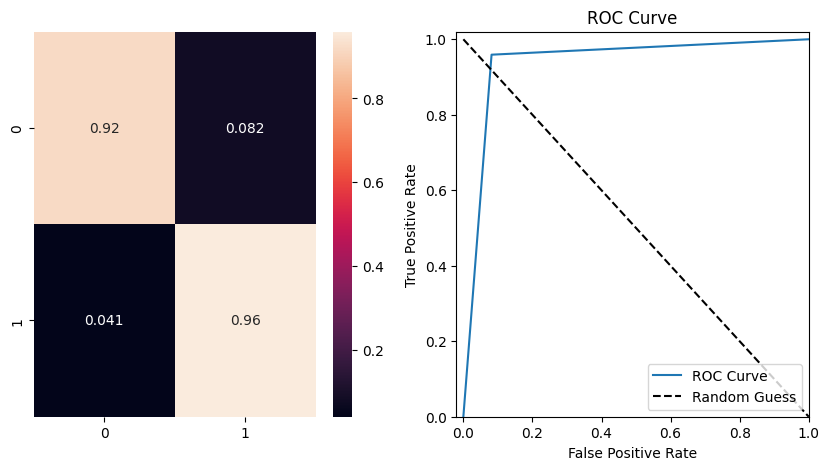

In [26]:
# Here we are using the 'classify' function we previously defined.

# We are passing in an instance of the SGDClassifier class from sklearn.linear_model module as the argument. 
# The SGDClassifier is instantiated with certain parameters:
# loss='modified_huber': This sets the loss function to be 'modified Huber'. This makes the model robust to outliers.
# penalty='elasticnet': This mixed penalty combines L1 and L2 as regularizer, providing a balance between Ridge and Lasso regression.
# max_iter=3000: The maximum number of passes over the training data (aka epochs). Setting this value to 3000 ensures the algorithm gets ample opportunity to converge.

# The classify function will train this classifier on the previously defined X_train, y_train data,
# and evaluate its performance using multiple metrics on the X_test, y_test data.
classify(SGDClassifier(loss='modified_huber',penalty='elasticnet',max_iter=3000))


              precision    recall  f1-score   support

           0       0.96      0.93      0.95    106571
           1       0.93      0.96      0.95    106300

    accuracy                           0.95    212871
   macro avg       0.95      0.95      0.95    212871
weighted avg       0.95      0.95      0.95    212871

The Accuracy of the Model is 0.9474235569899141
The Precision of the Model is 0.948169828097214
The Recall of the Model is 0.9337443905286584
The F1 Score of the Model is 0.9630479774223895


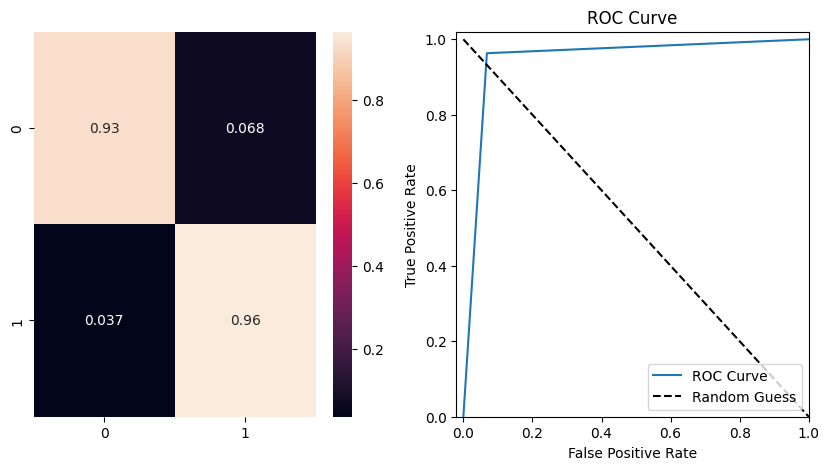

In [27]:
# Here we are using the 'classify' function we previously defined.

# We are passing an instance of the LogisticRegression class from sklearn.linear_model module as the argument. 
# The LogisticRegression is instantiated with a certain parameter:
# max_iter=3000: This sets the maximum number of iterations taken for the solver to converge.
# If the solver hasn't converged after max_iter iterations, it will stop and a warning message will be displayed.

# The classify function will train this classifier on the predefined X_train, y_train data,
# and evaluate its performance using multiple metrics on the X_test, y_test data.
classify(LogisticRegression(max_iter=3000))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    106571
           1       1.00      0.99      1.00    106300

    accuracy                           1.00    212871
   macro avg       1.00      1.00      1.00    212871
weighted avg       1.00      1.00      1.00    212871

The Accuracy of the Model is 0.9964532510299665
The Precision of the Model is 0.9964415830477958
The Recall of the Model is 0.9984509742805059
The F1 Score of the Model is 0.9944402634054562


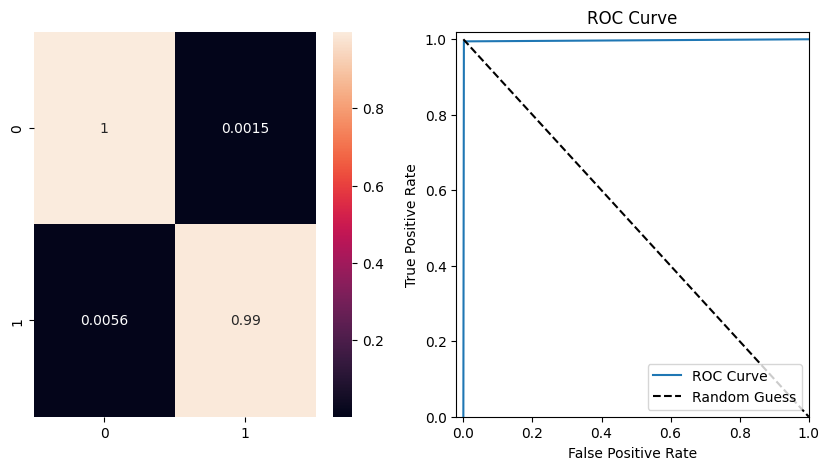

In [28]:
# Here we are using the 'classify' function we previously defined.

# We are passing an instance of the RandomForestClassifier class from sklearn.ensemble module as the argument. 
# The RandomForestClassifier is instantiated with a certain parameters:
# max_depth=10: This parameter represents the maximum depth of the tree. 
#               If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# min_samples_split=10: This is the minimum number of samples required to split an internal node. 

# The classify function will train this classifier on the predefined X_train, y_train data,
# and evaluate its performance using multiple metrics on the X_test, y_test data.
classify(RandomForestClassifier(max_depth=10,min_samples_split=10))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    106571
           1       0.99      1.00      0.99    106300

    accuracy                           0.99    212871
   macro avg       0.99      0.99      0.99    212871
weighted avg       0.99      0.99      0.99    212871

The Accuracy of the Model is 0.9916569189791
The Precision of the Model is 0.9916862495435863
The Recall of the Model is 0.9869644620860588
The F1 Score of the Model is 0.996453433678269


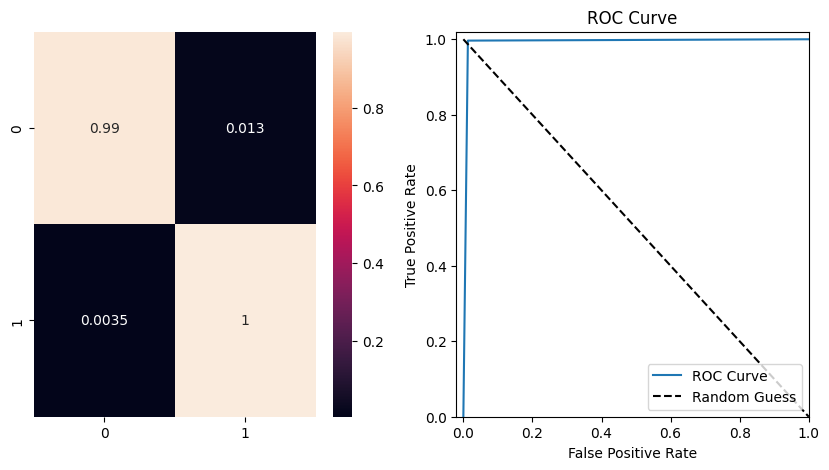

In [29]:
# Here we are calling the 'classify' function we previously defined.

# We are passing an instance of the KNeighborsClassifier class from sklearn.neighbors module as the argument. 
# The KNeighborsClassifier is instantiated with default parameters as no parameters are explicitly mentioned in the code.

# The 'classify' function will train this classifier on the predefined X_train, y_train data,
# and evaluate its performance using multiple metrics on the X_test, y_test data.
classify(KNeighborsClassifier())


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.93      0.95    106571
           1       0.93      0.97      0.95    106300

    accuracy                           0.95    212871
   macro avg       0.95      0.95      0.95    212871
weighted avg       0.95      0.95      0.95    212871

The Accuracy of the Model is 0.9493636991417337
The Precision of the Model is 0.950226035399129
The Recall of the Model is 0.933166453532138
The F1 Score of the Model is 0.9679209783631232


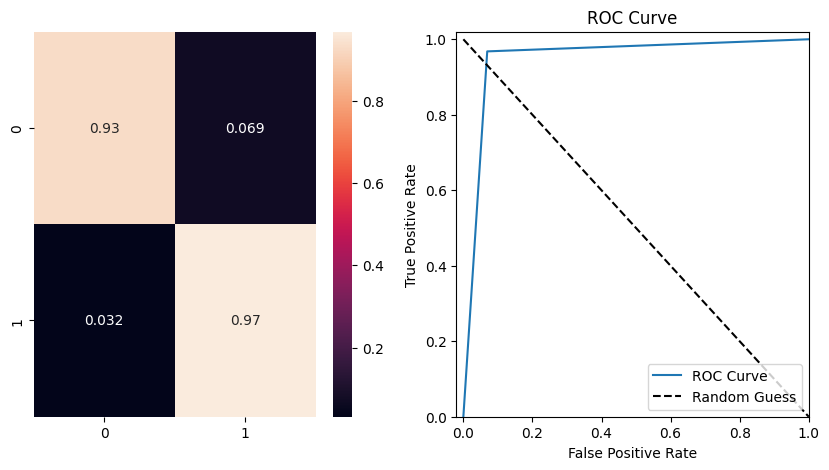

In [30]:
# This line of code is calling the 'classify' function which we have previously defined. 

# The LinearSVC class from sklearn.svm module has been instantiated with its default parameters and 
# this instance is passed as an argument to the 'classify' function. 

# LinearSVC stands for Linear Support Vector Classification. It is a subclass of the SVM (Support Vector Machine) class.

# In this context, 'classify' will train the LinearSVC classifier using predefined training data (X_train, y_train), 
# then evaluate its performance by testing it on the test data (X_test, y_test). The function might also display various metrics, 
# depending upon the implementation.
classify(LinearSVC())


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    106571
           1       1.00      1.00      1.00    106300

    accuracy                           1.00    212871
   macro avg       1.00      1.00      1.00    212871
weighted avg       1.00      1.00      1.00    212871

The Accuracy of the Model is 0.9984638583931114
The Precision of the Model is 0.9984617193931554
The Recall of the Model is 0.9985791578452129
The F1 Score of the Model is 0.9983443085606774


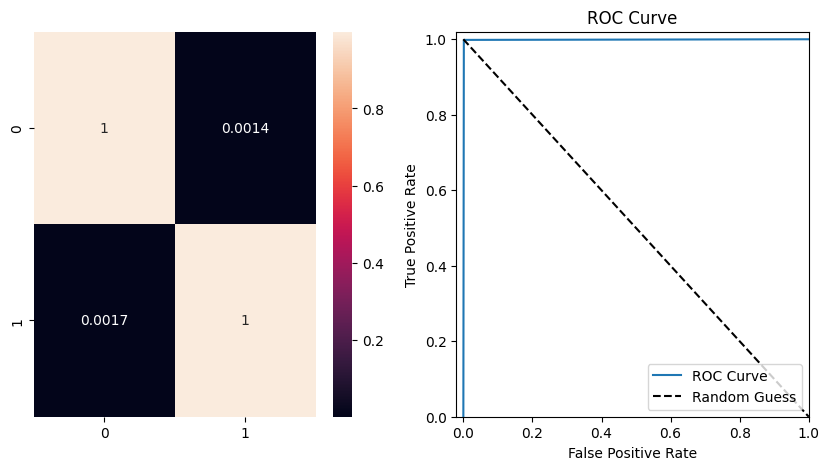

In [31]:
# This line of code is calling the 'classify' function which we have previously defined.

# The DecisionTreeClassifier class from the sklearn.tree module has been instantiated 
# with its default parameters and this instance is passed as an argument to the 'classify' function.

# DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset. 
# It constructs a decision tree based on the inputted training data.

# In this context, 'classify' will train the DecisionTreeClassifier using predefined training data (X_train, y_train), 
# then evaluate its performance by testing it on the test data (X_test, y_test). The function might also display various metrics,
# depending upon the implementation.
classify(DecisionTreeClassifier())


# Unbalanced Data

In [32]:
# This line of code locates the rows in the DataFrame 'df' where the 'label' column is 'ATTACK', 
# and replaces the 'ATTACK' value with the integer 1.
df.loc[df['label']== 'ATTACK','label']=1

# This line of code locates the rows in the DataFrame 'df' where the 'label' column is 'BENIGN',
# and replaces the 'BENIGN' value with the integer 0.
df.loc[df['label']== 'BENIGN','label']=0

# Here, we are dropping the 'label' column from the DataFrame 'df' and assign it to a new DataFrame 'Xu'. 
# The 'drop' function does not modify the original DataFrame df; it returns a new DataFrame without the 'label' column. 
Xu=df.drop(columns='label')

# Assigning the 'label' column of the DataFrame 'df' to the variable 'yu' and converting its datatype to integer.
yu=df['label'].astype('int')

# Applying MinMaxScaler on Xu DataFrame for feature scaling so that all features will have values between 0 and 1,
# which boosts the performance of the model. Then replacing Xu DataFrame with this newly scaled dataset.
Xu=MinMaxScaler().fit_transform(Xu)

# Splitting the DataSet into Train and Test sets, 
# here 25%(test_size=0.25) of data goes to Test Data and remaining 75% for Training data.
Xu_train,Xu_test,yu_train,yu_test=train_test_split(Xu,yu,test_size=0.25)


In [33]:
print(Xu_train.shape,yu_train.shape)
print(Xu_test.shape,yu_test.shape)

(1890598, 65) (1890598,)
(630200, 65) (630200,)


In [34]:
# This function takes a machine learning model as an argument and performs various operations like fitting, predicting,
# generating a classification report, plotting ROC curve, printing accuracy, precision, recall and F1 score of the model.
def classify2(model):
    # Training the model using training data
    model.fit(Xu_train, yu_train)
    
    # Predicting the target values for the test dataset using the trained model
    y_pred = model.predict(Xu_test)
    
    # Printing the classification report which includes metrics such as precision, recall, f1-score etc.
    print(classification_report(yu_test,y_pred))
    
    # Creating a figure for the confusion matrix and ROC curve plots
    fig=plt.figure(figsize=(10,5))
    
    # Subplot 1 for confusion matrix
    plt.subplot(1,2,1)
    
    # Calculating the confusion matrix and normalizing it 
    cm=confusion_matrix(yu_test,y_pred,normalize='true')
    
    # Plotting the confusion matrix as heat map
    sns.heatmap(cm,annot=True)
    
    # Computing Receiver operating characteristic (ROC) curve
    fpr,tpr,thresholds=roc_curve(yu_test,y_pred)
    
    # Subplot 2 for ROC curve
    plt.subplot(1,2,2)
    
    # Plotting the ROC curve
    plt.plot(fpr,tpr,label='ROC Curve')
    plt.plot([0,1],[0,1],'k--',label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.xlim([-0.02,1])
    plt.ylim([0,1.02])
    plt.legend(loc='lower right')
    
    # Printing the accuracy of the model
    print("The Accuracy of the Model is",accuracy_score(yu_test,y_pred))
    
    # Printing the F1 score of the model
    print("The Precision of the Model is",f1_score(yu_test,y_pred))
    
    # Printing the precision of the model
    print("The Recall of the Model is",precision_score(yu_test,y_pred))
    
    # Printing the recall of the model
    print("The F1 Score of the Model is",recall_score(yu_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97    523754
           1       0.84      0.84      0.84    106446

    accuracy                           0.95    630200
   macro avg       0.91      0.90      0.90    630200
weighted avg       0.95      0.95      0.95    630200

The Accuracy of the Model is 0.9463408441764519
The Precision of the Model is 0.8403067681671358
The Recall of the Model is 0.8448390466242522
The F1 Score of the Model is 0.8358228585386017


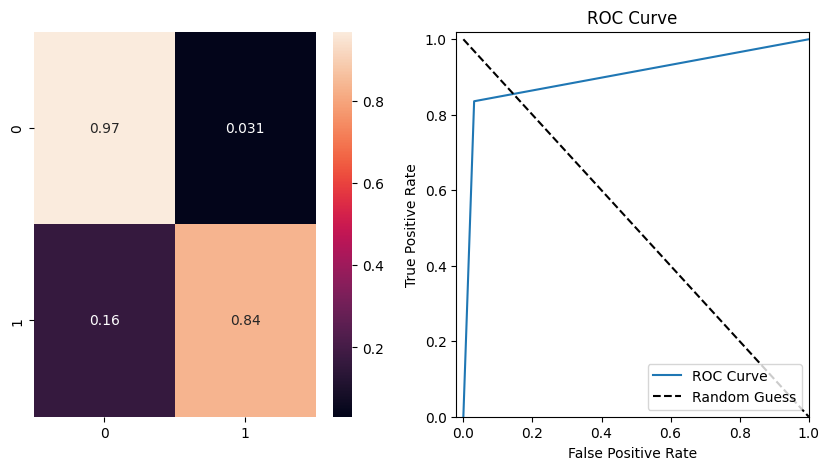

In [35]:
classify2(LogisticRegression(max_iter=3000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523754
           1       1.00      1.00      1.00    106446

    accuracy                           1.00    630200
   macro avg       1.00      1.00      1.00    630200
weighted avg       1.00      1.00      1.00    630200

The Accuracy of the Model is 0.9989019358933672
The Precision of the Model is 0.9967493423524991
The Recall of the Model is 0.9968055320668208
The F1 Score of the Model is 0.9966931589726247


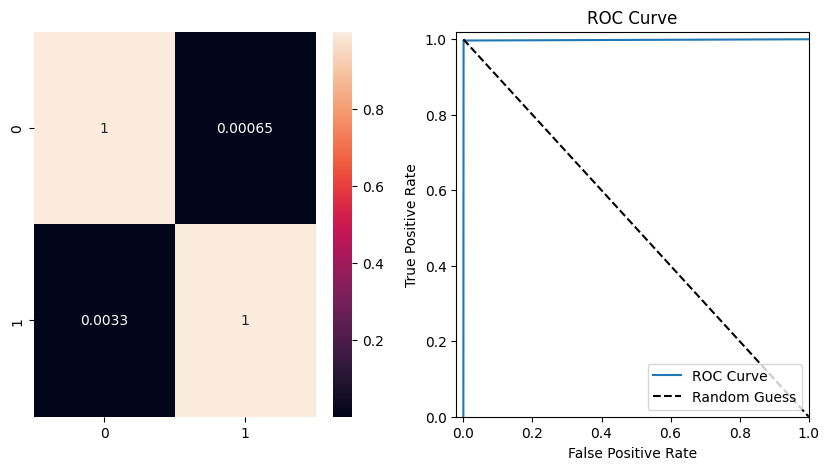

In [36]:
classify2(RandomForestClassifier(max_depth=50))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523754
           1       0.98      0.98      0.98    106446

    accuracy                           0.99    630200
   macro avg       0.99      0.99      0.99    630200
weighted avg       0.99      0.99      0.99    630200

The Accuracy of the Model is 0.9924119327197715
The Precision of the Model is 0.977561305216926
The Recall of the Model is 0.97654404319946
The F1 Score of the Model is 0.9785806887999549


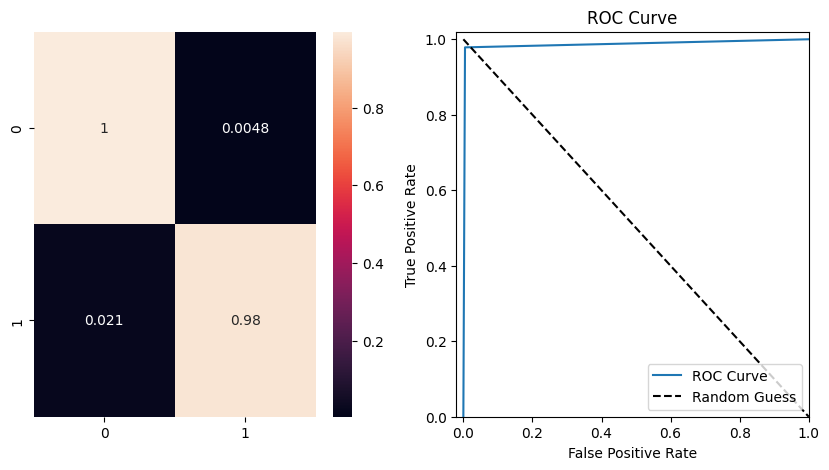

In [37]:
classify2(KNeighborsClassifier())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      0.98      0.97    523754
           1       0.88      0.82      0.85    106446

    accuracy                           0.95    630200
   macro avg       0.92      0.90      0.91    630200
weighted avg       0.95      0.95      0.95    630200

The Accuracy of the Model is 0.9500285623611552
The Precision of the Model is 0.8468928366539289
The Recall of the Model is 0.877640064490125
The F1 Score of the Model is 0.8182270822764595


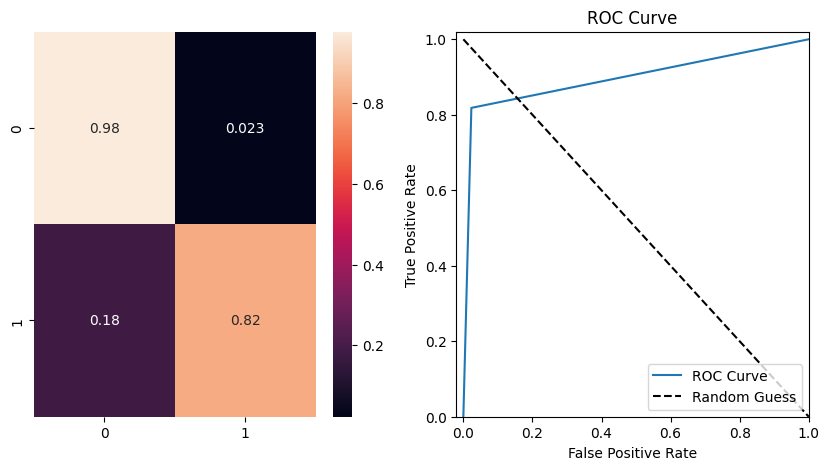

In [38]:
classify2(LinearSVC())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523754
           1       1.00      0.99      1.00    106446

    accuracy                           1.00    630200
   macro avg       1.00      1.00      1.00    630200
weighted avg       1.00      1.00      1.00    630200

The Accuracy of the Model is 0.998414788955887
The Precision of the Model is 0.9953057820172451
The Recall of the Model is 0.9956660305164099
The F1 Score of the Model is 0.9949457941115684


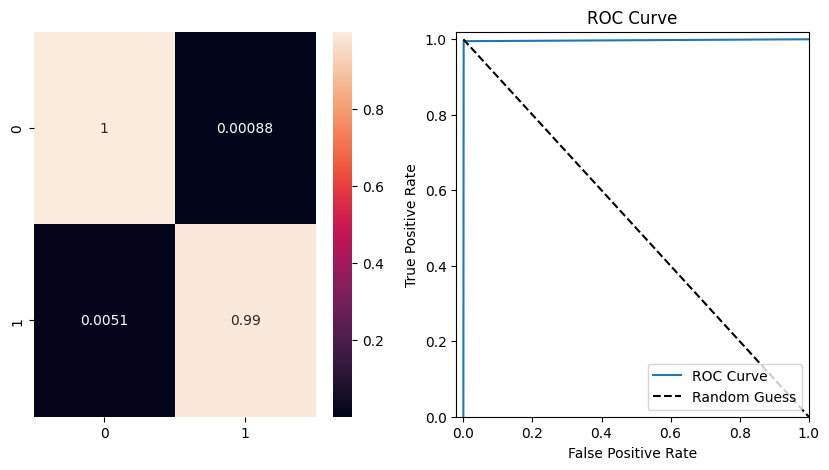

In [39]:
classify2(DecisionTreeClassifier())

# Classifying attacks

In [40]:
new_df=new_df[new_df['label']!='BENIGN']
print(new_df.shape)

(425741, 66)


In [41]:
new_df['label'].value_counts()

label
DoS Hulk                      172846
DDoS                          128014
PortScan                       90694
DoS GoldenEye                  10286
FTP-Patator                     5931
DoS slowloris                   5385
DoS Slowhttptest                5228
SSH-Patator                     3219
Bot                             1948
Web Attack � Brute Force        1470
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name: count, dtype: int64

In [42]:
# Importing the required modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Dropping the 'label' column from the dataframe to create a feature matrix
Xn=new_df.drop(columns='label')

# Scaling all the features between 0 and 1 using MinMaxScaler
Xn=MinMaxScaler().fit_transform(Xn)

# Extracting the target variable 'label'
yn=new_df['label']

# Encoding the categorical values in 'label' column to numeric values
yn=LabelEncoder().fit_transform(yn)

# Splitting the dataset into training set and testing set. The test size is 25% of the total dataset.
Xn_train,Xn_test,yn_train,yn_test=train_test_split(Xn, yn, test_size=0.25)


In [43]:
print(Xn_test.shape,Xn_train.shape)
print(yn_test.shape,yn_train.shape)

(106436, 65) (319305, 65)
(106436,) (319305,)


In [44]:
# Importing required metrics from the sklearn library for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Definition of function 'classify3' which takes a machine learning model as an input
def classify3(model):
    # Training/fitting the model with training data
    model.fit(Xn_train, yn_train)
    
    # Making predictions on the testing data
    y_pred = model.predict(Xn_test)

    # Printing the classification report which includes precision, recall, f1-score, and support
    print(classification_report(yn_test, y_pred))

    # Creating a figure for the confusion matrix visualization
    plt.figure(figsize=(15, 15))
    cm = confusion_matrix(yn_test, y_pred)

    # Plotting a Heatmap of the Confusion Matrix
    sns.heatmap(cm, annot=True)

    # Print the Accuracy of the Model 
    print("The Accuracy of the Model is", accuracy_score(yn_test, y_pred))

    # Print the Weighted F1 Score of the Model 
    print("The Precision of the Model is", f1_score(yn_test, y_pred, average='weighted'))

    # Print the Precision of the Model
    print("The Recall of the Model is", precision_score(yn_test, y_pred, average='weighted'))

    # Print the Recall of the Model
    print("The F1 Score of the Model is", recall_score(yn_test, y_pred, average='weighted'))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       457
           1       0.98      0.99      0.99     31954
           2       0.98      0.97      0.98      2536
           3       0.99      0.99      0.99     43239
           4       0.91      0.86      0.89      1290
           5       0.86      0.87      0.87      1350
           6       0.93      1.00      0.96      1462
           7       1.00      1.00      1.00         3
           8       0.00      0.00      0.00         7
           9       0.99      1.00      0.99     22768
          10       0.93      0.97      0.95       823
          11       0.61      0.83      0.70       383
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00       158

    accuracy                           0.98    106436
   macro avg       0.73      0.73      0.72    106436
weighted avg       0.98      0.98      0.98    106436

The Accuracy of the Model

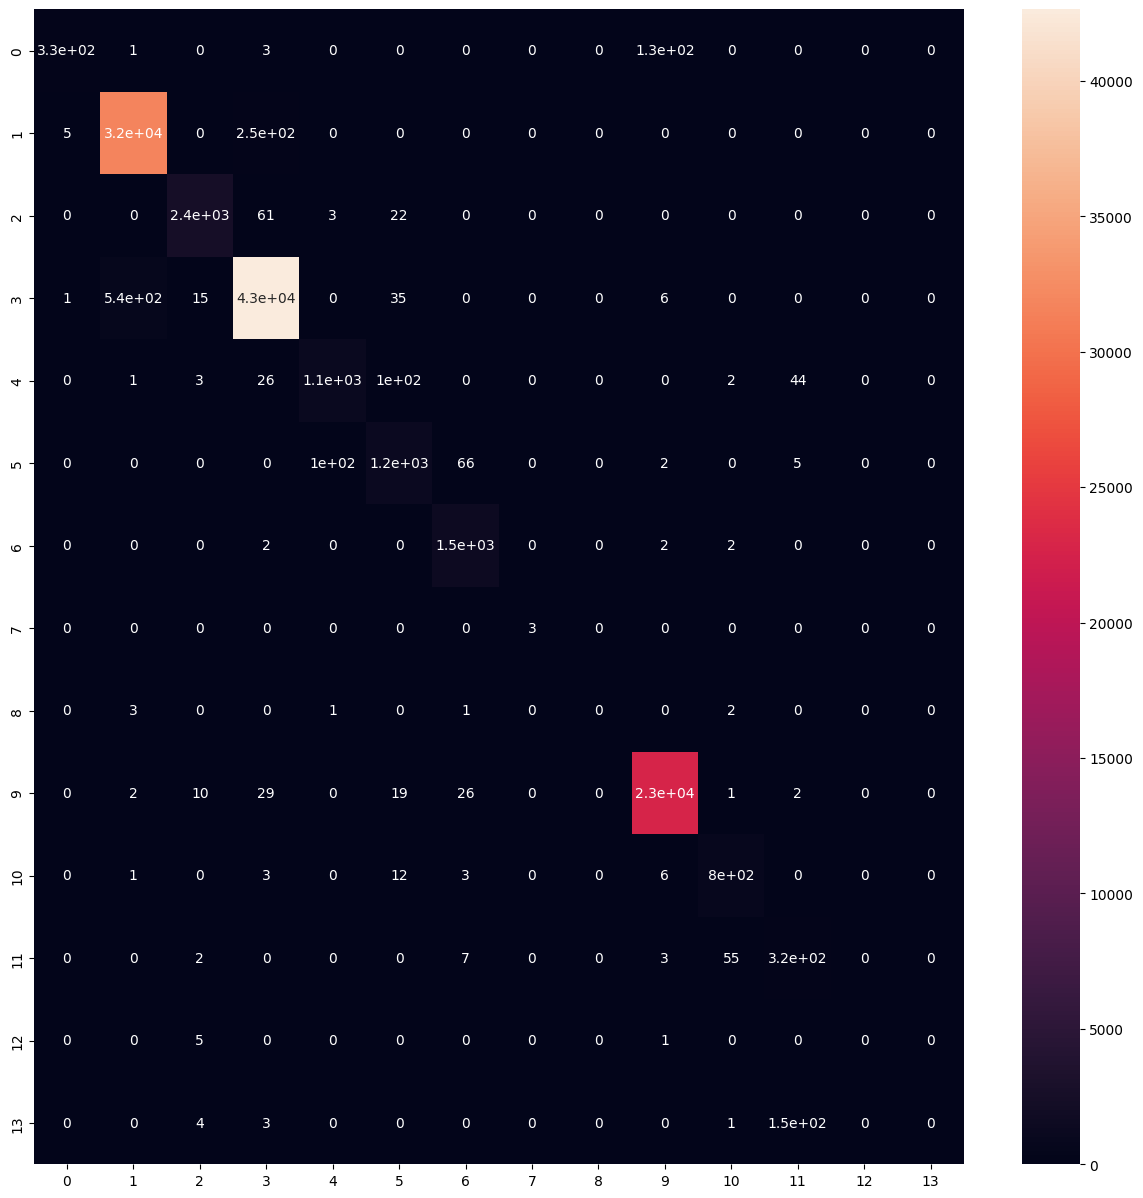

In [45]:
classify3(LogisticRegression(max_iter=3000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       457
           1       1.00      1.00      1.00     31954
           2       1.00      1.00      1.00      2536
           3       1.00      1.00      1.00     43239
           4       1.00      0.99      0.99      1290
           5       0.99      1.00      1.00      1350
           6       1.00      1.00      1.00      1462
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00     22768
          10       1.00      1.00      1.00       823
          11       0.75      0.77      0.76       383
          12       0.83      0.83      0.83         6
          13       0.40      0.37      0.38       158

    accuracy                           1.00    106436
   macro avg       0.93      0.93      0.93    106436
weighted avg       1.00      1.00      1.00    106436

The Accuracy of the Model

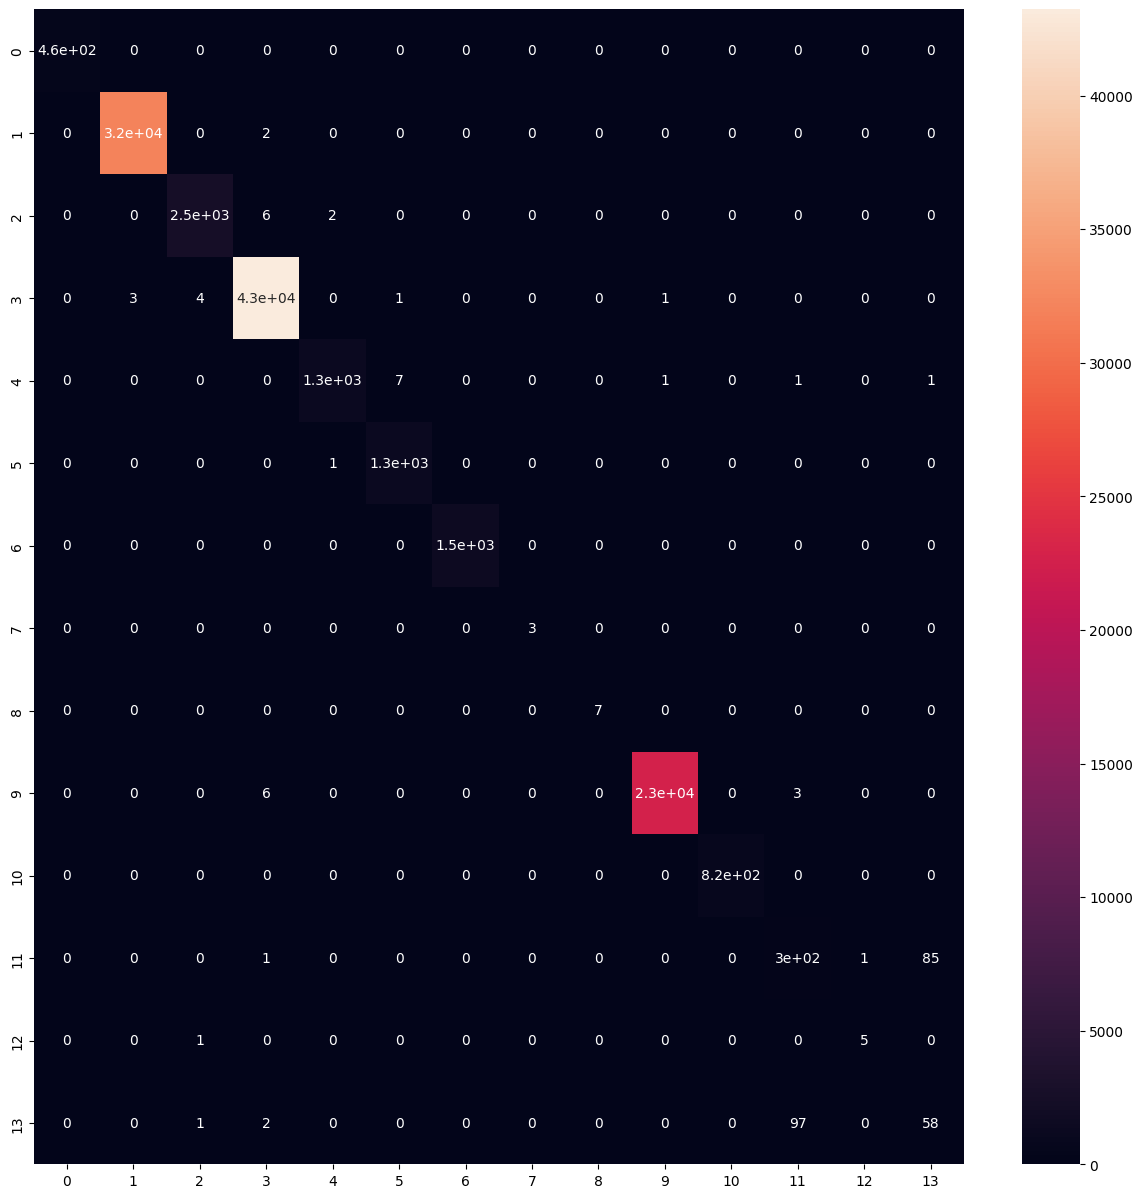

In [46]:
classify3(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       457
           1       1.00      1.00      1.00     31954
           2       0.99      1.00      1.00      2536
           3       1.00      1.00      1.00     43239
           4       0.99      0.99      0.99      1290
           5       0.99      0.99      0.99      1350
           6       1.00      1.00      1.00      1462
           7       1.00      1.00      1.00         3
           8       1.00      0.57      0.73         7
           9       1.00      1.00      1.00     22768
          10       1.00      0.99      0.99       823
          11       0.75      0.79      0.77       383
          12       0.67      0.33      0.44         6
          13       0.41      0.34      0.37       158

    accuracy                           1.00    106436
   macro avg       0.91      0.86      0.88    106436
weighted avg       1.00      1.00      1.00    106436

The Accuracy of the Model

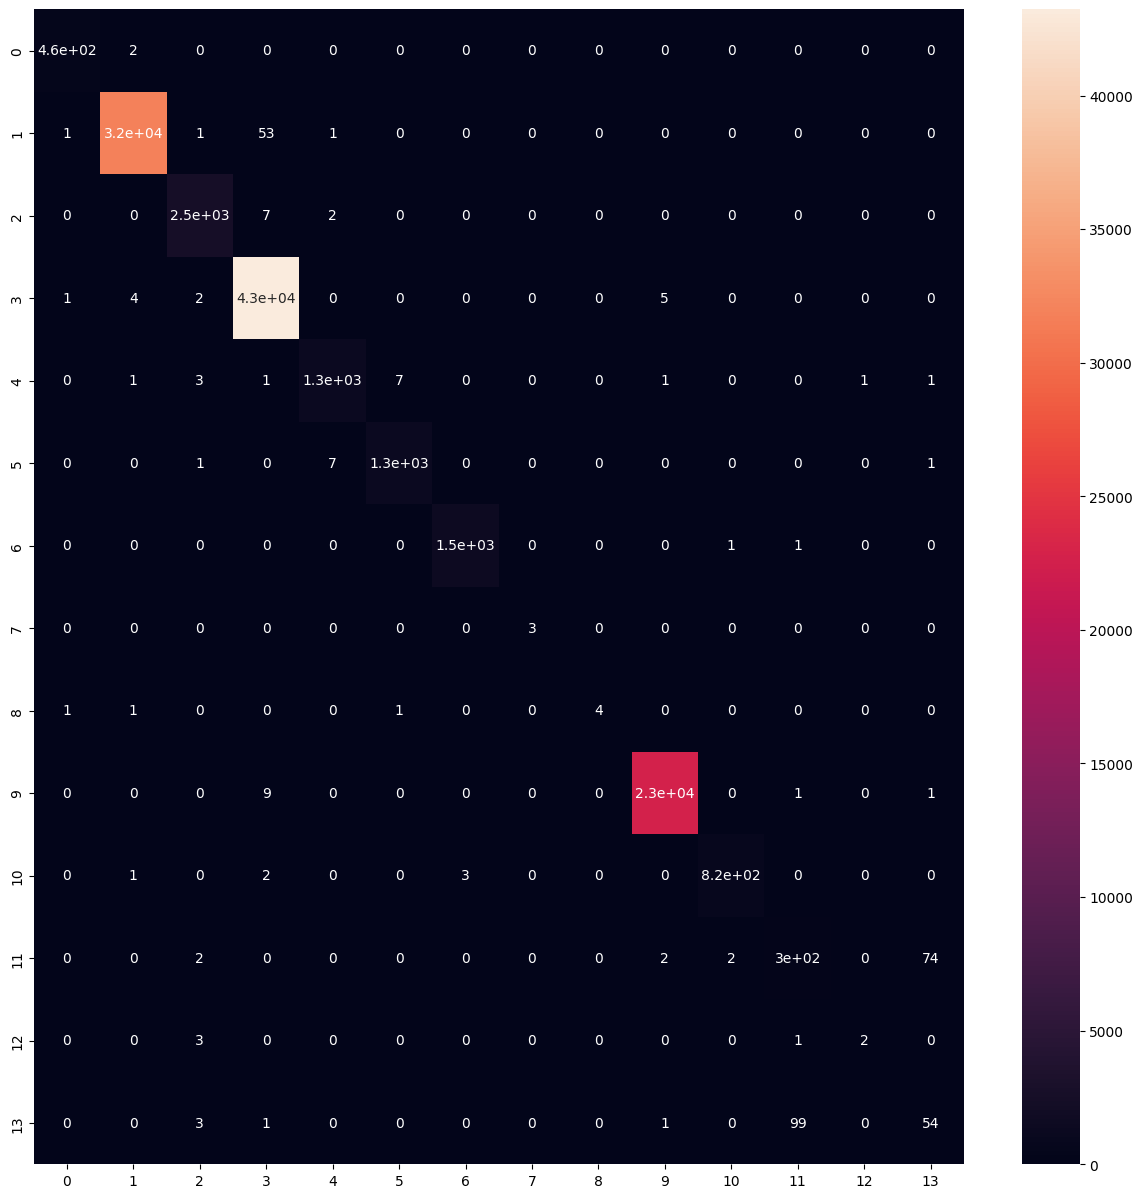

In [47]:
classify3(KNeighborsClassifier())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.72      0.83       457
           1       0.99      1.00      0.99     31954
           2       0.98      0.98      0.98      2536
           3       1.00      0.99      0.99     43239
           4       0.96      0.90      0.93      1290
           5       0.87      0.94      0.90      1350
           6       0.96      1.00      0.98      1462
           7       0.67      0.67      0.67         3
           8       0.80      0.57      0.67         7
           9       0.99      1.00      0.99     22768
          10       0.96      0.97      0.96       823
          11       0.68      0.87      0.77       383
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00       158

    accuracy                           0.99    106436
   macro avg       0.77      0.76      0.76    106436
weighted avg       0.99      0.99      0.99    106436

The Accuracy of the Model

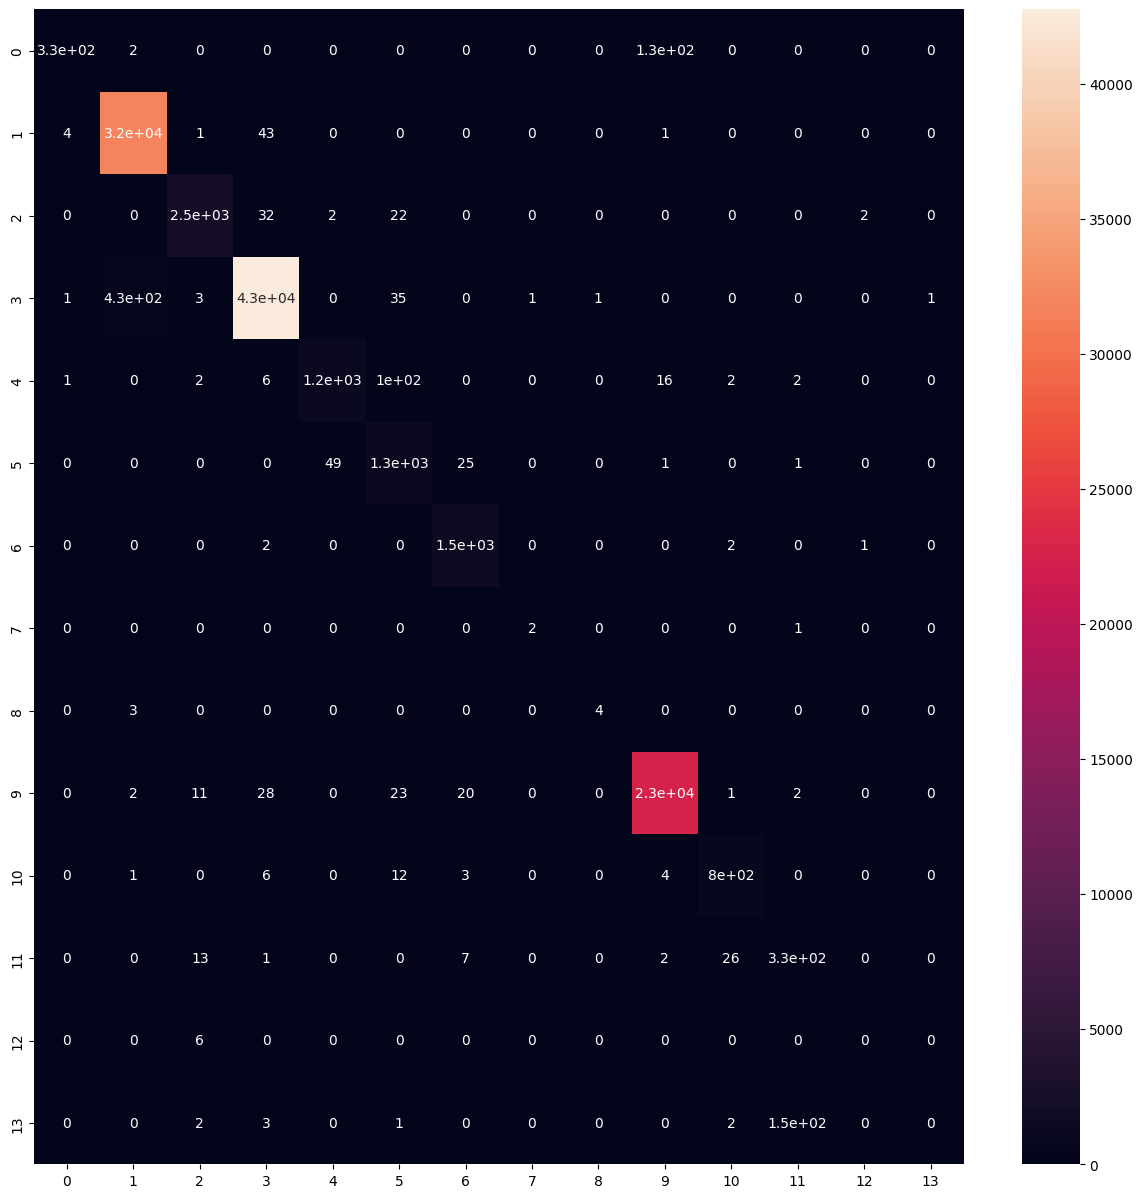

In [48]:
classify3(LinearSVC())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       457
           1       1.00      1.00      1.00     31954
           2       1.00      1.00      1.00      2536
           3       1.00      1.00      1.00     43239
           4       0.99      0.99      0.99      1290
           5       0.99      1.00      1.00      1350
           6       1.00      1.00      1.00      1462
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00     22768
          10       1.00      1.00      1.00       823
          11       0.76      0.74      0.75       383
          12       1.00      0.67      0.80         6
          13       0.41      0.41      0.41       158

    accuracy                           1.00    106436
   macro avg       0.94      0.92      0.92    106436
weighted avg       1.00      1.00      1.00    106436

The Accuracy of the Model

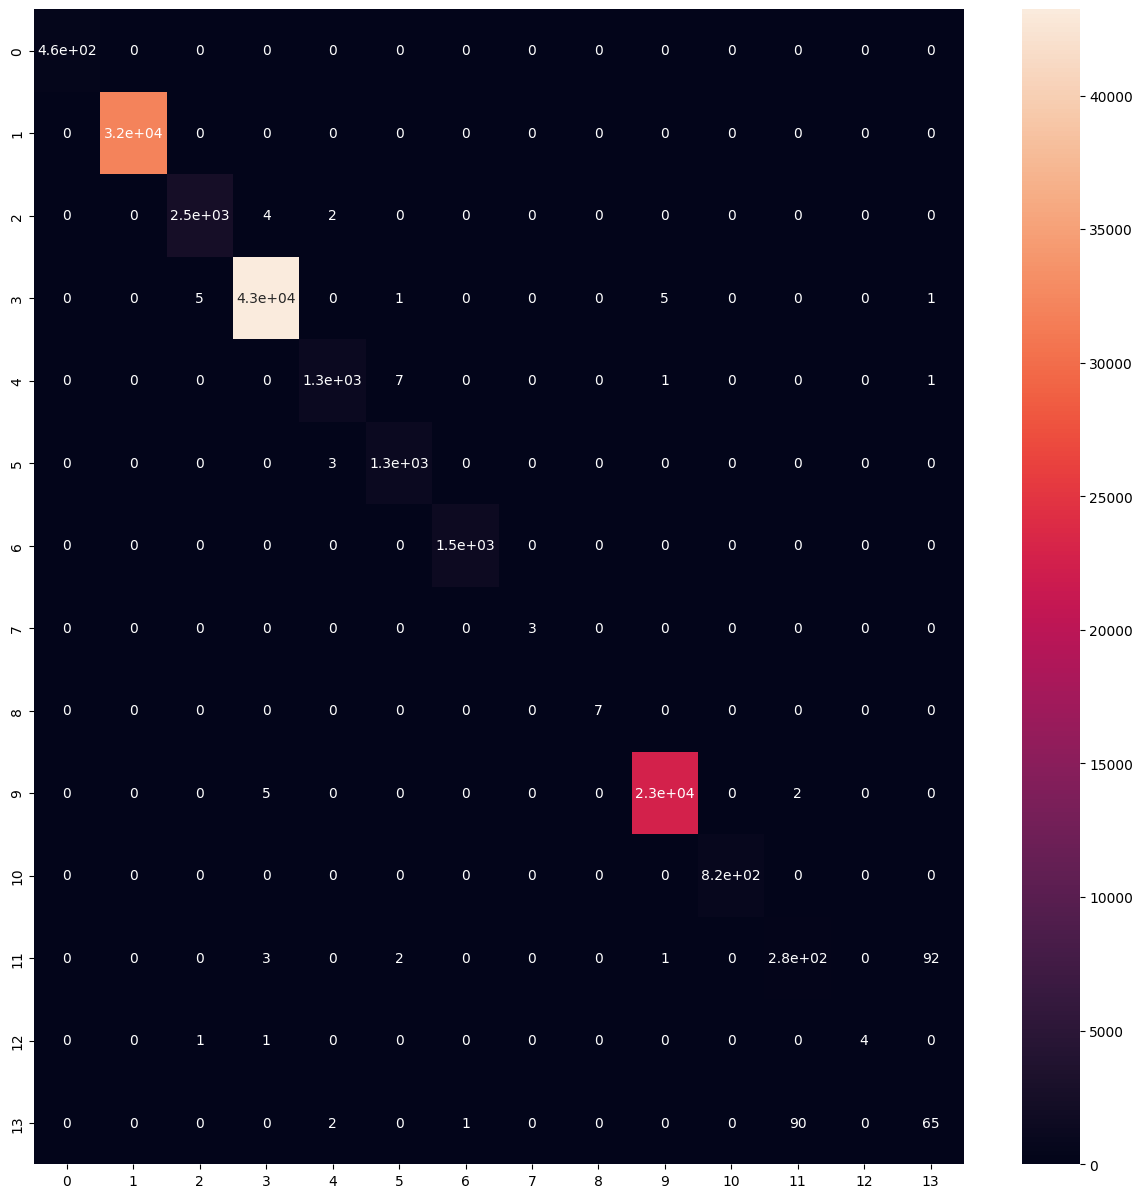

In [49]:
classify3(DecisionTreeClassifier())

## Results:
- we can use classify2 to identify if an instance is a benign or an attack 
    Best thing to do is use KNN, to as the relation to benign to attack higher, so anomolies will be labeled as an attack
- then use classify3 to identify the different types of attack 
    once attack is identified we can use decision trees to identify the types of attack.
    the reason we wont use decision tree is because it over fits the data.
- the results from balanced and unbalanced is not that different.